### Kernel Functions, Kernel Smoothing, Kernel Regression


Types of Kernel Functions (Nonparametric Statistics)

https://en.wikipedia.org/wiki/Kernel_(statistics)#Kernel_functions_in_common_use


https://www.statsmodels.org/dev/nonparametric.html


Any function satisfying specific normalization, symmetry conditions
- Gaussian
- Uniform
- Silvermans
- Triangular 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
from scipy.stats import gaussian_kde, norm

### Example of Gaussian Kernel Density Estimation

At each point creates a PDF describing proabbility of near obseved values 

In [2]:
y=norm.rvs(size=500)+0.1*np.random.rand(500)
df_describe = pd.DataFrame(y)
df_describe.describe()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,0
count,500.000000
mean,0.084006
std,1.056837
min,-3.332530
25%,-0.662513
50%,0.086234
75%,0.810580
max,3.326492


In [3]:
scott_kernel=gaussian_kde(y,bw_method='scott')
x=np.linspace(min(y),max(y),500)
print("Bandwith Factor is",scott_kernel.factor)
print("Kernel Covariance is , ",scott_kernel.covariance)

<IPython.core.display.Javascript object>

Bandwith Factor is 0.2885399811814427
Kernel Covariance is ,  [[0.0929883]]


<IPython.core.display.Javascript object>

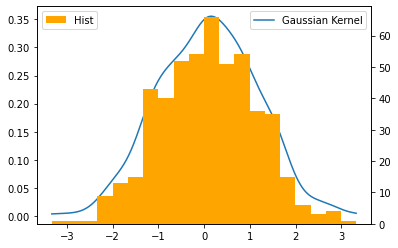

In [4]:
fig,ax=plt.subplots()
ax.plot(x,scott_kernel(x),label='Gaussian Kernel')
ax2=ax.twinx()
ax2.hist(y,bins=20,color='orange',label='Hist')
ax.legend()
ax2.legend(loc='upper left')

Bandwith essentially determines smoothest as value increases smoothest, the degree of intersection between local kernels -> Stronger effect than shapes of kernels

Natural question, what if we change the value of the bandwith as this a parameterized value

Choices:
- Scotts -> Function of n/ dimensions
- Silverman -> Function of n/ dimensions

In [5]:
silver_kernel=gaussian_kde(y,bw_method='silverman')
x=np.linspace(min(y),max(y),500)
print("Bandwith Factor is",silver_kernel.factor)
print("Kernel Covariance is , ",silver_kernel.covariance)

<IPython.core.display.Javascript object>

Bandwith Factor is 0.30562842716315974
Kernel Covariance is ,  [[0.1043287]]


Hand-Selecting Bandwith

In [6]:
kernel1=gaussian_kde(y,bw_method=0.75)
x=np.linspace(min(y),max(y),500)
print("Bandwith Factor is",kernel1.factor)
print("Kernel Covariance is , ",kernel1.covariance)

<IPython.core.display.Javascript object>

Bandwith Factor is 0.75
Kernel Covariance is ,  [[0.62825916]]


In [7]:
kernel2=gaussian_kde(y,bw_method=0.10)
x=np.linspace(min(y),max(y),500)
print("Bandwith Factor is",kernel2.factor)
print("Kernel Covariance is , ",kernel2.covariance)

<IPython.core.display.Javascript object>

Bandwith Factor is 0.1
Kernel Covariance is ,  [[0.01116905]]


Comparing Results

<IPython.core.display.Javascript object>

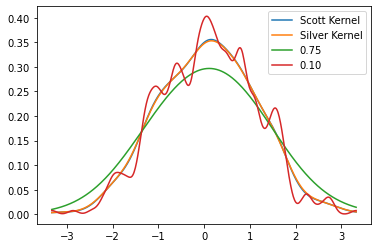

In [8]:
fig,ax=plt.subplots()
ax.plot(x,scott_kernel(x),label='Scott Kernel')
ax.plot(x,silver_kernel(x),label='Silver Kernel')
ax.plot(x,kernel1(x),label='0.75')
ax.plot(x,kernel2(x),label='0.10')
ax.legend()


### Functional Data Analysis

In [9]:
import skfda
from skfda import FDataGrid
from skfda.misc.hat_matrix import NadarayaWatsonHatMatrix
from skfda.preprocessing.smoothing import KernelSmoother



OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Kernel Regression

In [10]:
fd = FDataGrid(grid_points=[1, 2, 4, 5, 7],data_matrix=[[1, 2, 3, 4, 5]],)
kernel_estimator = NadarayaWatsonHatMatrix(bandwidth=3.5)
smoother = KernelSmoother(kernel_estimator=kernel_estimator)
fd_smoothed = smoother.fit_transform(fd)
fd_smoothed.data_matrix.round(2)

array([[[2.42],
        [2.61],
        [3.03],
        [3.24],
        [3.65]]])

# Functional Approximation:
    
    - Given a set of data find the simplest, closest function!!
    - Uses Penalized Least squares problem

In [11]:
# Data is sampled from a sum of trig functions
t = np.linspace(0, 1, 10)
x = np.sin(2 * np.pi * t) + np.cos(2 * np.pi * t) + 2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Fourier
- Encode Data as discrete grid
- Set Basis function as fourier
- Approximate data via 3 basis functions of fourier series, solving via cholesky decomp
- Extract coefficients


In [12]:
fd = skfda.FDataGrid(data_matrix=x, grid_points=t)
basis = skfda.representation.basis.Fourier((0, 1), n_basis=3)

smoother = skfda.preprocessing.smoothing.BasisSmoother(basis,method='cholesky',return_basis=True)
fourier_basis = smoother.fit_transform(fd)
coeff=fourier_basis.coefficients.round(2)[0]
coeff

array([2.  , 0.71, 0.71])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

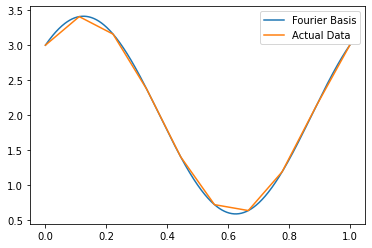

In [13]:
fourier_basis.plot(label='Fourier Basis')
plt.plot(t,x,label='Actual Data')
plt.legend()
plt.show()

### B-Spline Basis

In [14]:
fd = skfda.FDataGrid(data_matrix=x, grid_points=t)

basis3 = skfda.representation.basis.BSpline(n_basis=5, order=3)
smoother3 = skfda.preprocessing.smoothing.BasisSmoother(basis3,method='cholesky',return_basis=True,)
fd_basis3 = smoother3.fit_transform(fd)
coeff=fd_basis3.coefficients.round(2)[0]
print("Basis for Cubic Spline is",coeff)

basis1 = skfda.representation.basis.BSpline(n_basis=5, order=1)
smoother1 = skfda.preprocessing.smoothing.BasisSmoother(basis1,method='cholesky',return_basis=True,)
fd_basis1 = smoother1.fit_transform(fd)
coeff1=fd_basis1.coefficients.round(2)[0]
print("Basis for Linear Spline is",coeff1)

Basis for Cubic Spline is [2.98 4.2  0.4  1.15 3.07]
Basis for Linear Spline is [3.2  2.76 1.06 0.91 2.56]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

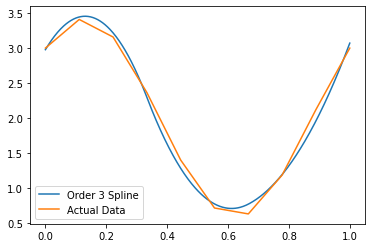

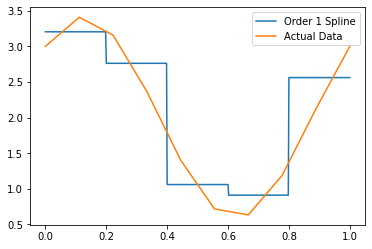

In [15]:
fd_basis3.plot(label='Order 3 Spline')
plt.plot(t,x,label='Actual Data')
plt.legend()
fd_basis1.plot(label='Order 1 Spline')
plt.plot(t,x,label='Actual Data')
plt.legend()
plt.show()

### Polynomial Approach

In [23]:
fd = skfda.FDataGrid(data_matrix=x, grid_points=t)

basis3 = skfda.representation.basis.Monomial(domain_range=(0,1), n_basis=4)
smoother3 = skfda.preprocessing.smoothing.BasisSmoother(basis3,method='cholesky',return_basis=True,)
fd_basis3 = smoother3.fit_transform(fd)
coeff=fd_basis3.coefficients.round(2)[0]
print("Basis for Cubic Polynomial is",coeff)

basis1 =  skfda.representation.basis.Monomial(domain_range=(0,1), n_basis=2)
smoother1 = skfda.preprocessing.smoothing.BasisSmoother(basis1,method='cholesky',return_basis=True,)
fd_basis1 = smoother1.fit_transform(fd)
coeff1=fd_basis1.coefficients.round(2)[0]
print("Basis for Linear Polynomial is",coeff1)


Basis for Cubic Polynomial is [  3.19   2.9  -23.87  21.08]
Basis for Linear Polynomial is [ 2.77 -1.35]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

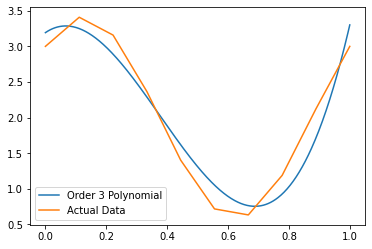

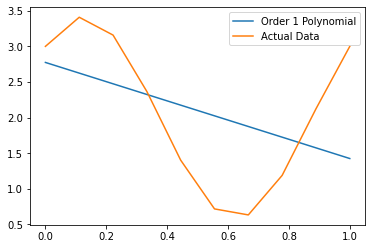

In [24]:
fd_basis3.plot(label='Order 3 Polynomial')
plt.plot(t,x,label='Actual Data')
plt.legend()
fd_basis1.plot(label='Order 1 Polynomial')
plt.plot(t,x,label='Actual Data')
plt.legend()
plt.show()